# Documentation
MShapely is a [Shapely](https://shapely.readthedocs.io/en/latest/manual.html) wrapper to enhance shapely functionalities and to manipulate spatial data for Marine Energy Resource Assessment Canada.

It provides extra functionality such as complex resampling, simplification, nearest nodes, etc. MShapely was mainly developed to help the development of complex 2-dimensional meshes for free-surface hydrodynamic models in coastal regions.

[![mesh](img/mesh.png)](img/mesh.png)


## Chaining Method
MShapely and Shapely smartly employs a technique called chain syntax.
By “chaining” methods together with periods, you can perform several actions in a single line of code. 
It means is that when you call a method on an object, it performs the method and returns an object. 
Since the method on an object returns an object, another method can be called without having to explicitly reference an object again. 

Here's an example:


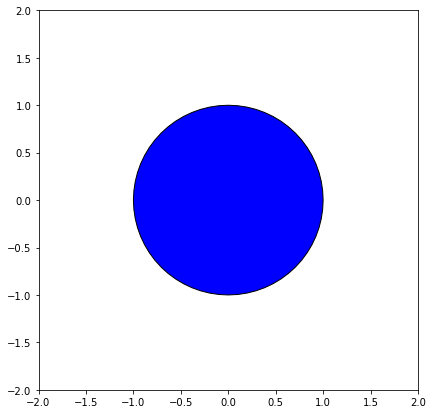

In [1]:
from IPython.display import display
from shapely.geometry import Point,LineString,Polygon,MultiPoint,MultiLineString,MultiPolygon
import numpy as np
import matplotlib.pyplot as plt
import mshapely

# Non-chaining method
point = Point((0,0))
circle = point.buffer(1)

# Chaining method
circle = Point((0,0)).buffer(1).plot()

## Density Field Documentation
[Docs](doc_density.ipynb)

## User-guide and Examples
New attributes and methods are applied for all geometric objects (Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon, GeometryCollection).
However, some of the methods are not applicable (i.e point.resample()) and returns the original object. 
Most of the methods returns a geometric object with a few exception (i.e. object.inearest()) - check "output" in the method description.

## Methods and Attributes
### object.np

In [2]:
from mshapely.mshapely import np as _np
print(_np.__doc__)


  Returns numpy array of the object.
  It returns coordinates,(and ids for line and polygon)
  XY coordinates are always place last.

  Note
  ----
  x:x-coordinate
  y:y-coordinate
  lid: line id
  pid: polygon id
  cid: collection id
  
  Output
  ------ 
  ndarray: 2D array
   shape: Point, (npoint,2) : [[x,y]] 
          LineString, (npoint,3) : [[lid,x,y]]
          Polygon, (npoint,4) : [[pid,lid,x,y]]
          MultiPoint, (npoint,3) : [[x,y]]
          MultiLineString, (npoint,4) : [[cid,lid,x,y]]
          MultiPolygon, (npoint,5) : [[cid,pid,lid,x,y]]
  
  


In [3]:
display(Point(0,0).np)
display(LineString([[0,0],[1,0],[2,0]]).np)
display(Polygon([[0,0],[1,0],[2,0],[0,0]]).np)
display(MultiPoint([[0,0],[1,0],[2,0],[0,0]]).np)
display(MultiLineString([[[0,0],[1,0]],[[2,0],[3,0]]]).np)
display(MultiPolygon([Polygon([[0,0],[1,0],[2,0],[0,0]])]).np)

array([[0., 0.]])

array([[0., 0., 0.],
       [1., 1., 0.],
       [2., 2., 0.]])

array([[0., 0., 0., 0.],
       [0., 1., 1., 0.],
       [0., 2., 2., 0.],
       [0., 0., 0., 0.]])

array([[0., 0.],
       [1., 0.],
       [2., 0.],
       [0., 0.]])

array([[0., 0., 0., 0.],
       [0., 1., 1., 0.],
       [1., 0., 2., 0.],
       [1., 1., 3., 0.]])

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 2., 2., 0.],
       [0., 0., 0., 0., 0.]])

### object.xy

In [4]:
from mshapely.mshapely import xy
print(xy.__doc__)


  Returns numpy array of the object xy coordinates.
  Output
  ------ 
  ndarray: 2D array
   shape:(npoint,2) : [[x,y]] 
  


In [5]:
from IPython.display import display
from shapely.geometry import Point,LineString,Polygon,MultiPoint,MultiLineString,MultiPolygon
display(Point(0,0).xy)  
display(LineString([[0,0],[1,0],[2,0]]).xy)
display(Polygon([[0,0],[1,0],[2,0],[0,0]]).xy)
display(MultiPoint([[0,0],[1,0],[2,0],[0,0]]).xy)
display(MultiLineString([[[0,0],[1,0]],[[2,0],[3,0]]]).xy)
display(MultiPolygon([Polygon([[0,0],[1,0],[2,0],[0,0]])]).xy)

array([[0., 0.]])

array([[0., 0.],
       [1., 0.],
       [2., 0.]])

array([[0., 0.],
       [1., 0.],
       [2., 0.],
       [0., 0.]])

array([[0., 0.],
       [1., 0.],
       [2., 0.],
       [0., 0.]])

array([[0., 0.],
       [1., 0.],
       [2., 0.],
       [3., 0.]])

array([[0., 0.],
       [1., 0.],
       [2., 0.],
       [0., 0.]])

### object._np([,isNorm,onPoint])

In [6]:
from mshapely.mshapely import _np
print(_np.__doc__)


  Returns object numpy array with normal vector information.
  Only applicable for LineString, Polygon, MultiLineString, MultiPolygon
  
  Parameters
  ----------
  isNorm: bool,optional
    If True, returns normal vectors information
  onPoint: bool,optional
    If True,computes normal vectors on point.
    If False, computer normal vector from segment.
    Default is True.
  
  Note
  ----
  xo:x-source point
  yo:y-source point
  xn:x-target vector point
  yn:y-target vector point
  
  Output
  ------ 
  ndarray: 2D array
   shape: LineString, (npoint,7) : [[lid,xo,yo,xn,yn,x,y]]
          Polygon, (npoint,4) : [[pid,lid,xo,yo,xn,yn,x,y]]
          MultiLineString, (npoint,4) : [[cid,lid,xo,yo,xn,yn,x,y]]
          MultiPolygon, (npoint,5) : [[cid,pid,lid,xo,yo,xn,yn,x,y]]  
  


In [7]:
from IPython.display import display
from shapely.geometry import LineString

display(LineString([[0,0],[1,0],[2,0]])._np())
display(LineString([[0,0],[1,0],[2,0]])._np(isNorm=True))
display(LineString([[0,0],[1,0],[2,0]])._np(isNorm=True,onPoint=False))

array([[0., 0., 0.],
       [1., 1., 0.],
       [2., 2., 0.]])

array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0., -1.,  1.,  0.],
       [ 2.,  2.,  0.,  0.,  1.,  2.,  0.]])

array([[ 0. ,  0.5,  0. ,  0. , -1. ,  0. ,  0. ],
       [ 1. ,  1.5,  0. ,  0. , -1. ,  1. ,  0. ],
       [ 2. ,  1. ,  0. ,  0. ,  1. ,  2. ,  0. ]])

### object.write(path[,schema,properties])

In [8]:
from mshapely.mshapely import write
print(write.__doc__)


  Write geometry object to file depending on the file extension.
  Works for geojson and shapefile.
  
  Parameters
  ----------
  path: str
  schema: dict,optional
   Schema is used for shapefiles. 
   Creates it automatically unless specified.
  properties: list,optional
   Length must be equal to length of the object.  
  


In [9]:
import os
path_p_geo="test_io.point.geojson"
path_p_shp="test_io.point.shp"
Point((0,0)).write(path_p_geo).write(path_p_shp)
os.path.exists(path_p_geo)

True

### object.delete(path) or mshapely.io.delete(path)

In [10]:
from mshapely.mshapely import delete
print(delete.__doc__)


  Delete file(s).For shapefiles, it will delete associate files(.dbf,.shx,.cgf).
  
  Parameters
  ----------
  path: str  
  


In [27]:
path_p_geo="test_io.point.geojson"
path_p_shp="test_io.point.shp"
Point((0,0)).write(path_p_shp).delete(path_p_shp).delete(path_p_geo)

os.path.exists(path_p_shp)

False

### object.resample([,maxLength])

In [12]:
from mshapely.mshapely import resample
print(resample.__doc__)


  Resample object using equal segment length. 
  The segment is automatically calculated using the length of the LineString and maxLength parameter.
  The segment is equal or smaller than the maxLength.
  
  Parameters
  ----------
  maxLength: float,optional
    Default is 1.0.
  


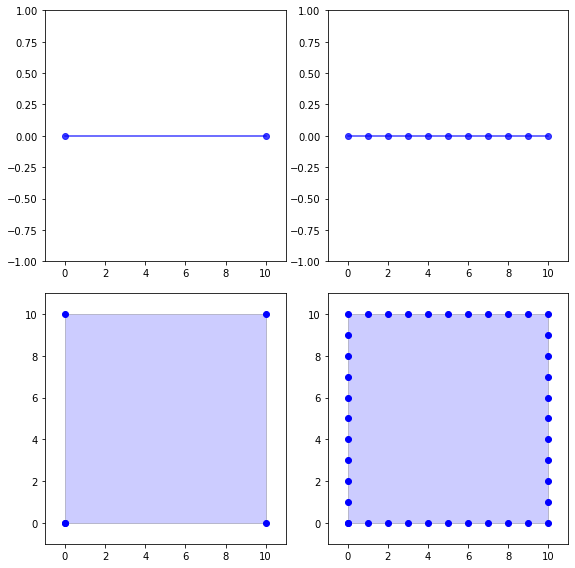

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.tight_layout()

LineString([(0,0),(10,0)])\
 .plot(axe=axes[0][0],lineStyle={"marker":"o"})\
 .resample()\
 .plot(axe=axes[0][1],lineStyle={"marker":"o"})

Polygon([(0, 0), (0, 10),(10,10),(10,0),(0,0)])\
 .plot(axe=axes[1][0],showPoints=True,polygonStyle={"alpha":0.2})\
 .resample()\
 .plot(axe=axes[1][1],showPoints=True,polygonStyle={"alpha":0.2})
pass


### object.dresample(df[,mp])

In [14]:
from mshapely.mshapely import dresample
print(dresample.__doc__)

 
  Resample object using a 2D Density Field object. 
  The length of the segments are automatically calculated using the Density Field.
  
  Parameters
  ----------
  df: Density Field object
  mp:MultiPoint,optional
   MultiPoint are part of the resampling. 
   An error will raise if the distance between points are smaller than minDensity.
   
  


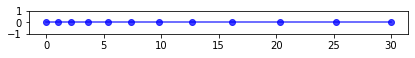

In [15]:
LineString([(0,0),(30,0)])\
 .dresample(mshapely.DF(np.array([[0,0,1,1.2]]), minDensity=1.0, maxDensity=5.0))\
 .plot(lineStyle={"marker":"o"})
pass

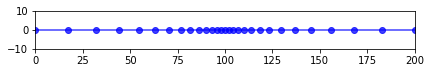

In [16]:
mp = MultiPoint([(100,0)])
density = np.array([[0,0,100,1.2],[100,0,1,1.2],[200,0,100,1.2]])
LineString([(0,0),(200,0)])\
 .dresample(mshapely.DF(density,minDensity=2.0, maxDensity=100.0),mp=mp)\
 .plot(extent=[0,-10,200,10],lineStyle={"marker":"o"})
pass

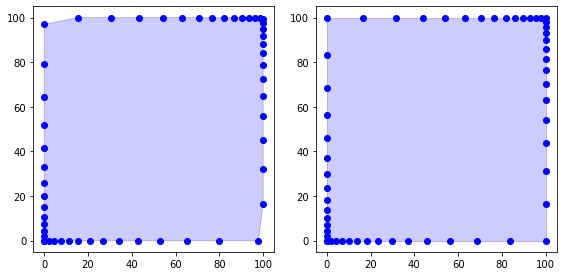

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
fig.tight_layout()
mp = MultiPoint([(0, 0), (0, 100),(100,100),(100,0)])
density = np.array([[0,0,1,1.2],[100,100,1,1.2]])

Polygon([(0, 0), (0, 100),(100,100),(100,0),(0,0)])\
 .dresample(mshapely.DF(density,minDensity=2.0,maxDensity=20.0))\
 .plot(axe=axes[0],showPoints=True,polygonStyle={"alpha":0.2})

Polygon([(0, 0), (0, 100),(100,100),(100,0),(0,0)])\
 .dresample(mshapely.DF(density,minDensity=2.0,maxDensity=20.0),mp)\
 .plot(axe=axes[1],showPoints=True,polygonStyle={"alpha":0.2})
pass

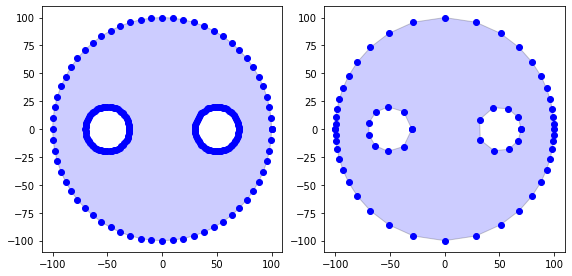

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
fig.tight_layout()
polygon = Point((0,0)).buffer(100)
hole1 = Point((-50,0)).buffer(20)
hole2 = Point((50,0)).buffer(20)
polygon = Polygon(polygon.exterior,[hole1.exterior.coords[::-1],hole2.exterior.coords[::-1]])
density = np.array([[-100,0,5,1.2],[100,0,5,1.2]])
mp = MultiPoint([(-100, 0), (0, 100),(0,100),(0,-100)])

polygon\
 .plot(axe=axes[0],showPoints=True,polygonStyle={"alpha":0.2})\
 .dresample(mshapely.DF(density,minDensity=2.0,maxDensity=50.0),mp)\
 .plot(axe=axes[1],showPoints=True,polygonStyle={"alpha":0.2})
pass

### object.removeHoles([,area])

In [19]:
from mshapely.mshapely import removeHoles
print(removeHoles.__doc__)


  Remove holes based on area
  
  Parameters
  ----------
  polygon: 
  area: 
    default=1.0
  


#### Example

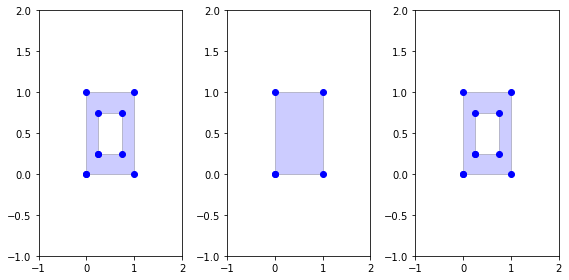

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
fig.tight_layout()
polygon = Polygon([(0, 0), (0, 1),(1,1),(1,0),(0,0)],[LineString([(0.25, 0.25),(0.75,0.25) ,(0.75,0.75),(0.25, 0.75),(0.25,0.25)])])\
 .plot(axe=axes[0],showPoints=True,polygonStyle={"alpha":0.2})
polygon.removeHoles()\
 .plot(axe=axes[1],showPoints=True,polygonStyle={"alpha":0.2})
polygon.removeHoles(0.1)\
 .plot(axe=axes[2],showPoints=True,polygonStyle={"alpha":0.2})
pass

### object.largest()

In [21]:
from mshapely.mshapely import largest
print(largest.__doc__)


  Gets only the largest polygon from a MultiPolygon and GeometryCollection
  


#### Example

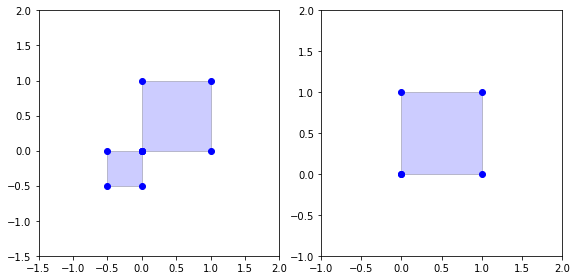

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
fig.tight_layout()
mp=MultiPolygon([Polygon([(0,0),(1,0),(1,1),(0,1),(0,0)]),Polygon([(0,0),(-0.5,0),(-0.5,-0.5),(0,-0.5),(0,0)])])\
 .plot(axe=axes[0],showPoints=True,polygonStyle={"alpha":0.2})
mp.largest()\
 .plot(axe=axes[1],showPoints=True,polygonStyle={"alpha":0.2})
pass

### mshapely.dsimplify(df)

In [23]:
from mshapely.mshapely import dsimplify
print(dsimplify.__doc__)


  Simplify polygons and remove points by respecting Density Field.
  It mainly uses the buffer/unbuffer techniques for different density area/zone.
  The zones are created using different buffer distance on the density points.
  To speed up simplification, the function allows fine and coarse resolution polygons
  
  Parameters
  ----------
  polyon:Polygon
    Domain or outline
  df:Density Field
  limitFineDensity:float
    Threshold value to swtich from fine to coarse
  fine:Polygon or MultiPolygon
    Fine resolution data
  coarse:Polygon or MultiPolygon
    Coarse resolution data
  


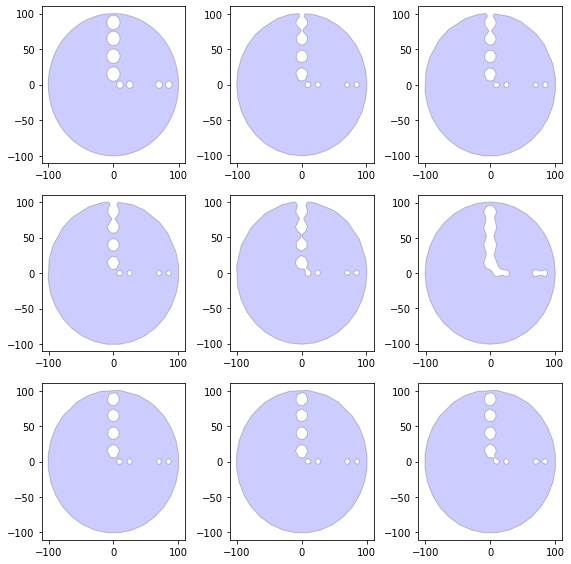

In [24]:
exterior=Point(0,0).buffer(100).exterior
holes = [
    Point(10,0).buffer(5).exterior.coords[::-1],
    Point(25,0).buffer(5).exterior.coords[::-1],
    Point(70,0).buffer(5).exterior.coords[::-1],
    Point(85,0).buffer(5).exterior.coords[::-1],
    
    Point(0,15).buffer(10).exterior.coords[::-1],
    Point(0,40).buffer(10).exterior.coords[::-1],
    Point(0,65).buffer(10).exterior.coords[::-1],
    Point(0,87.5).buffer(10).exterior.coords[::-1],
    ]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
fig.tight_layout()

polygon = Polygon(exterior,holes)\
.plot(axe=axes[0][0],polygonStyle={"alpha":0.2})
polygon.dsimplify(mshapely.DF(np.array([[0,0,1,1.2]]),minDensity=1,maxDensity=100))\
.plot(axe=axes[0][1],polygonStyle={"alpha":0.2})
polygon.dsimplify(mshapely.DF(np.array([[0,0,5,1.2]]),minDensity=5,maxDensity=100))\
.plot(axe=axes[0][2],polygonStyle={"alpha":0.2})

polygon.dsimplify(mshapely.DF(np.array([[0,0,10,1.2]]),minDensity=10,maxDensity=100))\
.plot(axe=axes[1][0],polygonStyle={"alpha":0.2})
polygon.dsimplify(mshapely.DF(np.array([[0,0,20,1.2]]),minDensity=20,maxDensity=100))\
.plot(axe=axes[1][1],polygonStyle={"alpha":0.2})
polygon.dsimplify(mshapely.DF(np.array([[0,0,100,1.2]]),minDensity=100,maxDensity=1000))\
.plot(axe=axes[1][2],polygonStyle={"alpha":0.2})

polygon.dsimplify(mshapely.DF(np.array([[0,0,5,1.2],[0,100,5,1.2]]),minDensity=5,maxDensity=100))\
.plot(axe=axes[2][0],polygonStyle={"alpha":0.2})
polygon.dsimplify(mshapely.DF(np.array([[0,0,10,1.2],[0,100,5,1.2]]),minDensity=5,maxDensity=100))\
.plot(axe=axes[2][1],polygonStyle={"alpha":0.2})
polygon.dsimplify(mshapely.DF(np.array([[0,0,20,1.2],[0,100,5,1.2]]),minDensity=5,maxDensity=100))\
.plot(axe=axes[2][2],polygonStyle={"alpha":0.2})
pass

### object.inearest(maxDistance[,angle,nvalue])

In [25]:
from mshapely.mshapely import inearest
print(inearest.__doc__)


  Computes nearest interior nodes based on its normal and an angle spread.
  The maximum search distance needs to be specified to avoid searching large quantities of points in large domains. 
  
  Parameters
  ----------
  maxDistance:float
   Maximum search distance.
   Default is 1.0
  angle:float,0<angle<180.0 
   Angle spread.  Limits the search within the angle spread.
   Default value is 90.0. 
  nvalue:int
    Number of points processed at the same time.
    Default is 1000
  
  Output
  ------
  ndarray:2D array
   shape:(n,3)
    n: Number of points in the original object.
    3:x,y,density  
  


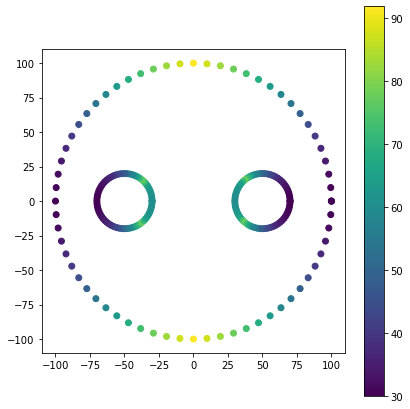

In [26]:
polygon = Point((0,0)).buffer(100)
hole1 = Point((-50,0)).buffer(20)
hole2 = Point((50,0)).buffer(20)
polygon = Polygon(polygon.exterior,[hole1.exterior.coords[::-1],hole2.exterior.coords[::-1]])
distance=polygon.inearest(maxDistance=100,angle=90)

MultiPoint(distance[:,:2])\
 .plot(pointStyle={"c":distance[:,2]},showColorbar=True)
pass